In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1/ Tensors

In [3]:
# Scalar
scalar = torch.tensor(7.5)
scalar 

tensor(7.5000)

In [4]:
# Find the dimension
scalar.ndim
# Turn the tensor into normal number
scalar.item()

7.5

In [5]:
# Vector
vector = torch.tensor([7,7.5])
vector

tensor([7.0000, 7.5000])

In [6]:
vector.shape

torch.Size([2])

In [7]:
# MATRIX
MATRIX = torch.tensor([[7.8, 5],
                       [6, 5.4]])
MATRIX

tensor([[7.8000, 5.0000],
        [6.0000, 5.4000]])

In [8]:
MATRIX.ndim

2

In [9]:
MATRIX.shape

torch.Size([2, 2])

In [10]:
#Get 1st row
MATRIX[0]
#Get 2nd row
MATRIX[1]
#Get 1st column
MATRIX[:,0]
#Get 2nd column
MATRIX[:,1]

tensor([5.0000, 5.4000])

In [11]:
#TENSOR
TENSOR = torch.tensor(
    [
        [
            [3, 5, 8],
            [6, 1, 9],
            [7, 3, 1]
        ],
        [
            [1, 2, 3],
            [3, 6, 9],
            [2, 4, 5]
        ],
        [
            [1, 2, 3],
            [3, 6, 9],
            [2, 4, 5]
        ]
    ]
)
TENSOR

tensor([[[3, 5, 8],
         [6, 1, 9],
         [7, 3, 1]],

        [[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]],

        [[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [12]:
TENSOR.ndim

3

In [13]:
TENSOR.shape

torch.Size([3, 3, 3])

In [14]:
TENSOR[2]

tensor([[1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]])

### Random tensors
This is important since neural networks usually start learning with tensors with random numbers then adjust them to better represent the data.


In [15]:
randowm_tensor = torch.rand(1,3,3)
print(randowm_tensor)
print('Dimension:',randowm_tensor.ndim)

tensor([[[0.1417, 0.6162, 0.5018],
         [0.5662, 0.9883, 0.4032],
         [0.0836, 0.3067, 0.1492]]])
Dimension: 3


In [16]:
#create a random tensor with similar shape to an image tensor
img_size_tensor = torch.rand(3,224,224) #color channels, width, height
img_size_tensor.shape

torch.Size([3, 224, 224])

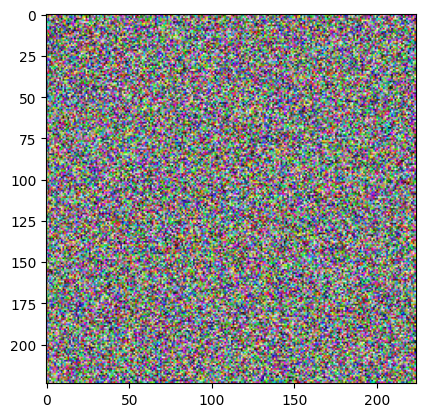

In [17]:
plt.imshow(img_size_tensor.permute(1, 2, 0))

### Zeros and ones

In [18]:
zeros = torch.zeros(3,4)
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [19]:
ones = torch.ones(3,4)
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

### A range of tensors and tensors-like

In [20]:
one_2_ten = torch.arange(1, 11)
one_2_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [21]:
#creating tensors like
ten_zeros = torch.zeros_like(one_2_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor datatypes
One of the big 3 errors you may run into with PyTorch and deep learning:
1. Tensors not right datatype
2. Tensors not right shape
3. Tensors not on the right device

In [22]:
float_32_tensor = torch.tensor([3,6,9],
                               dtype= torch.float32, # If dtype = None, dtype = float32
                               device="cuda", # What device is your tensor on
                               requires_grad=False) # Whether or not to track gradients with this tensors
#The higher the bit of float, the higher the precision (16,32,64)
float_32_tensor.dtype


torch.float32

In [23]:
float_16_tens = float_32_tensor.type(torch.float16)
float_16_tens * float_32_tensor

tensor([ 9., 36., 81.], device='cuda:0')

## Tensors operations
Including:
* Addition
* Subtraction
* Multiplication (element-wise)
* Division
* Matrix multiplication

In [24]:
tensor = torch.tensor([1,2,3])
print(tensor + 10, tensor - 10, tensor * 10, tensor / 10)

tensor([11, 12, 13]) tensor([-9, -8, -7]) tensor([10, 20, 30]) tensor([0.1000, 0.2000, 0.3000])


### Matrix multiplication

In [25]:
# Element-wise multiplication
tensor = torch.tensor([1,2,3])
print(f'{tensor}*{tensor} = {tensor*tensor}')
# Matrix multiplication
print(f'{tensor}*{tensor} = {torch.matmul(tensor,tensor)}') # 1*1 + 2*2 + 3*3 = 14

tensor([1, 2, 3])*tensor([1, 2, 3]) = tensor([1, 4, 9])
tensor([1, 2, 3])*tensor([1, 2, 3]) = 14


In [26]:
# THINGS TO REMEMBER:
# 1. The INNER DIMENSIONS must match:
print(torch.matmul(torch.rand(3,2),torch.rand(2,3))) # will work
print(torch.matmul(torch.rand(3,2),torch.rand(3,2))) # won't work
# 2. The resulting matrix have the shape of the OUTER DIMENSIONS:
print('matmul( (2,3),(3,2) ) = (2,2)')
print('matmul( (3,2),(2,3) ) = (3,3)')


tensor([[0.8275, 0.1208, 0.4207],
        [0.8814, 0.0681, 0.5134],
        [1.1824, 0.1373, 0.6392]])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [38]:
# We can use transpose (".T") to switch the dimensions of a tensor
tensor = torch.tensor([[2,3],
                       [4,5],
                       [6,7]])
print(tensor.shape)
print(tensor.T.shape)

torch.Size([3, 2])
torch.Size([2, 3])


### Find min, max, mean, sum, etc

In [39]:
x = torch.tensor([[0,10],[100,1000]])
x.dtype
print(f"""
      min:{torch.min(x)}\n
      max:{torch.max(x)}\n
      mean:{torch.mean(x.type(torch.float32))}\n
      sum:{torch.sum(x)}
""")


      min:0

      max:1000

      mean:277.5

      sum:1110



 ### Finding the positional min and max

In [40]:
x=torch.arange(1,11)
x

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [41]:
# Find the position in tensor that has the min/max value with .argmin() / .argmax() -> return an integer which is the index.
print(f"""x.argmin() = {x.argmin()} ({x.argmin().dtype})\n
x.argmax() = {x.argmax()} ({x.argmax().dtype})
""")

x.argmin() = 0 (torch.int64)

x.argmax() = 9 (torch.int64)



In [42]:
x[0], x[9]

(tensor(1), tensor(10))

### Reshaping, stacking, squeezing, unsqueezing tensors
* **Reshaping:** Reshape an inpun tensor to a defined shape
* **View:** Return a view of an input tensor of a certain shape but keep the same memory as the original tensor
* **Stacking:** Combine multiple tensors on top of each other (vstack) or side by side (hstack)
* **Squeeze:** remove all `1` dimensions from a tensor
* **Unsqueeze:** add a `1` dimension to a target tensor
* **Permute:** Return a view of the input with dimensions permuted (swapped) in a certain way

In [56]:
x = torch.arange(1,11)
x, x.shape

(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), torch.Size([10]))

In [51]:
# Add extra dimension
x_reshaped = x.reshape(5,2)
x_reshaped

tensor([[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8],
        [ 9, 10]])

In [55]:
# Change the view
z = x.view(1,10)
z, z.shape
# Changing z will also change x since x and z share the same memory

torch.Size([1, 10])

In [66]:
# Stack tensors on top of each other
x_stacked = torch.stack([x,x,x,x],dim= 0)
x_stacked, x_stacked.shape

(tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
         [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
         [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
         [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]]),
 torch.Size([4, 10]))

In [72]:
# torch.squeeze() removes all single dimensions from a target tensor
print(f"""Original tensor: {z.reshape(1,10)}\n
      Original shape: {z.reshape(1,10).shape}\n\n
      
Squeezed tensor: {z.squeeze()}\n
Squeezed shape: {z.squeeze().shape}""")

Original tensor: tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])
Original shape: torch.Size([1, 10])


Squeezed tensor: tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
Squeezed shape: torch.Size([10])


In [78]:
# torch.unsqueeze() adds a single dimension to a target tensor at a specific dim
print(f"""Original tensor: {z.squeeze()}\n
      Original shape: {z.squeeze().shape}\n\n
      
Unsqueezed tensor: {z.squeeze().unsqueeze(1)}\n
Unsqueezed shape: {z.squeeze().unsqueeze(1).shape}""")

Original tensor: tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

      Original shape: torch.Size([10])


      
Unsqueezed tensor: tensor([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]])

Unsqueezed shape: torch.Size([10, 1])


In [83]:
# torch.permute() rearranges the dimensions of a target tensor in a specified order
x = torch.rand(224,300,3)
print(f"""Original shape: {x.shape}\n
      Permuted shape: {x.permute(2,0,1).shape}""")

Original shape: torch.Size([224, 300, 3])

      Permuted shape: torch.Size([3, 224, 300])


### Indexing (Selecting data in tensor)

In [85]:
x = torch.arange(1,10).reshape(1,3,3)
x

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [86]:
x[0] # get the inside

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [88]:
x[0,0]
# or
x[0][0] # get the first bracket

tensor([1, 2, 3])

In [91]:
x[0][2][2]

tensor(9)

In [92]:
# Use ":" to select ALL of a target dimension
x[:,2,2]

tensor([9])

## Produce the same random tensor everytime using **RANDOM SEED**:

In [96]:
# WARNING: When using notebook you'll need to reuse torch.manual_seed() everytime you call torch.rand().
random_seed = 42
torch.manual_seed(random_seed)
random_tensor_A = torch.rand(3,4)

torch.manual_seed(random_seed)
random_tensor_B = torch.rand(3,4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## Using GPU

In [110]:
device = "cuda"
tensor_on_gpu = random_tensor_A.to(device)
tensor_on_gpu

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]], device='cuda:0')

In [108]:
# Tensor on GPU can't transform to NumPy
tensor_on_gpu.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [109]:
# Turn back to CPU
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([[0.88226926, 0.91500396, 0.38286376, 0.95930564],
       [0.3904482 , 0.60089535, 0.25657248, 0.7936413 ],
       [0.94077146, 0.13318592, 0.9345981 , 0.59357965]], dtype=float32)